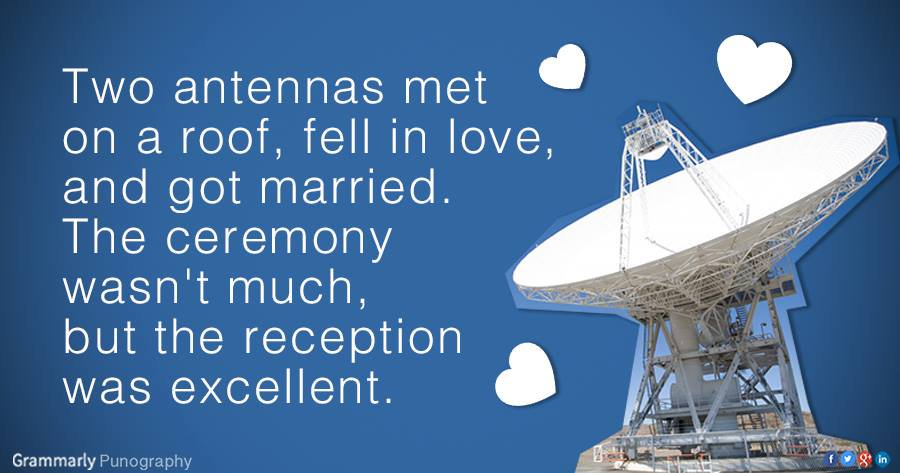

In [196]:
from IPython.display import Image
Image('https://pbs.twimg.com/media/B9HzS_8CUAEWVhq.jpg')

In [198]:
       
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlb
import ugradio.pico as pco
import ugradio.dft as dft
import ugradio.interf as ifm
import ugradio.hp_multi as hpm
import ugradio.coord as crd
from time import sleep
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_body
from astropy.time import Time
ifm = ifm.Interferometer()
hpm = hpm.HP_Multimeter()

'''
crab = SkyCoord(l = 184.5575*u.degree, b = -5.7844*u.degree, equinox frame = 'galactic')
crab = crab.fk5
print(crab.ra.deg, crab.dec.deg)
'''

hpm.start_recording(1)
for t in range(30600):
	sleep(1)
	data,time = hpm.get_recording_data()
	print(t,round(data[-1],6),time[-1])

	if(t%120 == 0):
		cAlt,cAz = crd.get_altaz(  8, 22.014436212370363)

		print(ifm.get_pointing())
		print(cAlt,cAz)
		ifm.point(cAlt,cAz)
		print(ifm.get_pointing())
	
	if(t%600 == 0):
		np.savez('CrabData' + str(t/300),time,data)
		
hpm.end_recording()		


hpm.start_recording(1)
for t in range(3600):
	sleep(1)
	data,time = hpm.get_recording_data()
	print(t,round(data[-1],6),time[-1])

	if(t%120 == 0):
 		sRA,sDec = crd.sunpos()
		mRA,mDec = crd.moonpos()
		sAlt,sAz = crd.get_altaz(sRA,sDec)
		mAlt,mAz = crd.get_altaz(mRA,mDec)

		print(ifm.get_pointing())
		print(mAlt,mAz)
		ifm.point(mAlt,mAz)
		print(ifm.get_pointing())
		np.savez('MoonData2',time,data)
		
hpm.end_recording()		


hpm.start_recording(1)
for t in range(1800):
	sleep(1)
	data,time = hpm.get_recording_data()
	print(t,round(data[-1],6),time[-1])

	if(t%120 == 0): 
		
		jAlt,jAz = crd.get_altaz(230.7875, -17.351916)

		print(ifm.get_pointing())
		print(cAlt,cAz)
		ifm.point(jAlt,jAz)
		print(ifm.get_pointing())
		np.savez('JupiterData',time,data)
		
hpm.end_recording()		


print(time,data)




(0.001482, 1520391289.8400331)
{'ant_w': (46.7412109375, 183.258496094), 'ant_e': (46.669921875, 183.255371094)}
(-49.11419824462031, 62.79880788134996)
{'ant_w': (46.7412109375, 183.258496094), 'ant_e': (46.669921875, 183.255371094)}
(0.001454, 1520391292.84094)
(0.001462, 1520391293.8407061)
(0.00148, 1520391294.8413551)
(0.001469, 1520391295.841177)
(0.001478, 1520391296.8412409)
(0.001469, 1520391297.8405221)
(0.001492, 1520391298.8413601)
(0.001484, 1520391299.841368)
(0.001477, 1520391300.8411939)
(0.001472, 1520391301.8406949)
(0.001465, 1520391302.840776)
(0.001472, 1520391303.8413811)
(0.001465, 1520391304.8410239)
(0.001457, 1520391305.8414099)
(0.001461, 1520391306.8414121)
(0.001456, 1520391307.841187)
(0.001479, 1520391308.8413501)
(0.001495, 1520391309.841363)
(0.001486, 1520391310.8412111)
(0.001508, 1520391311.8412271)
(0.001479, 1520391312.8406589)
(0.001481, 1520391313.8404231)
(0.001458, 1520391314.8412769)
(0.00146, 1520391315.841346)
(0.001465, 1520391316.8414071)


KeyboardInterrupt: 

In [192]:
import numpy as np 
import ugradio
import matplotlib.pylab as pl
%matplotlib inline

data = r"/home/data/Lab3_Week1_Data/"
crab = np.load(data + "CrabData98.npz")
crabV = crab["arr_1"]
crabT = ( crab["arr_0"][len(crab["arr_0"])-1] - crab["arr_0"][0] ) / len(crab["arr_0"])
moon = np.load(data + "MoonData1.npz")
moonV = moon["arr_1"]
moonT = ( moon["arr_0"][len(moon["arr_0"])-1] - moon["arr_0"][0] ) / len(moon["arr_0"])
sun = np.load(data + "SunData2.npz")
sunV = sun["arr_1"]
sunT = (sun["arr_0"][len(sun["arr_0"])-1] - sun["arr_0"][0]) / len(sun["arr_0"])


def plotPower(arr, spacing, log=False):
    voltage = np.fft.fft(arr)
    freqs = np.fft.fftfreq(len(voltage), spacing)
    power = np.abs(voltage)**2
    
    freqsG = np.fft.fftshift(freqs)[len(power)/2 + 5:]
    powerG = np.fft.fftshift(power)[len(power)/2 + 5:]
    
    if log:
        pl.semilogy(freqsG, powerG, 'k')
    else:
        pl.plot(freqsG, powerG, 'k')
    
    print [np.argmax(powerG)]
    return freqsG[np.argmax(powerG)]

In [35]:
print crab["arr_0"][50] - crab["arr_0"][49]

1.0003631115


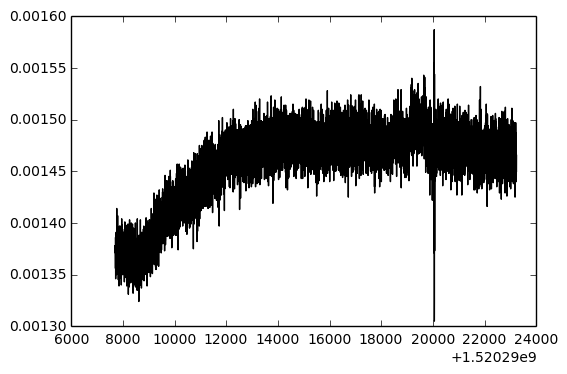

In [58]:
pl.plot(crab['arr_0'], crab["arr_1"], 'k')

In [204]:
Image('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUTEhIVFRUVFRYXFRUVFRUVFRUVFRUXFxUVFxUYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGisdHR8tLS0tLS0tLS0tLS0rLS0tLS0rLS0tKy0tLS0tLS0tLS0tLSstLS0tLS0tLS0rLS4tK//AABEIANIA8AMBIgACEQEDEQH/xAAcAAABBAMBAAAAAAAAAAAAAAAEAgMFBgABBwj/xABOEAABAwIEAwYCBgQHDgcAAAABAAIDBBEFEiExBkFRBxMiYXGBMpEUI0JSocEkcrHRU2KSk6K00xUXJTM0NUNzgoOys+HwFlRjhJTC8f/EABkBAAMBAQEAAAAAAAAAAAAAAAECAwAEBf/EACsRAAICAgICAQMCBwEAAAAAAAABAhEDIRIxBEEiEzJRcZEFI0JhgaHwJP/aAAwDAQACEQMRAD8A5YFtaC2uc7BKHn3RLkNOU0QoZWilOCSVQI6xFRIWIIqNJIw6tLAlBIKJssISllkDGlhCKoKCSZ4jiaXOPTkOpPIKUkwaGI2qJST9yHXXkHPcLAel1hXJIgbLLKZbRx+Q6G59rpNVHTs8JcS4i4LQbfNNTF+oiJAWWUjR4ex4J75rCASA5ryHW5Zmg5b+iFipy42FvyQCpoHIWWRlRQPYLkadRrvshnxEWuCL7X0usNyQhJypZC1ZYIhacEuyQVjAk6Q0JydIaFSwmOC00JTlpiYAnKtBOJAWCHJSyy20KIRJQk+6McELOmQBly0Vty04KlhHIkZEhIUZEpzMOALa0FuynYKMspPCcIdNdxc1kbTZznHUn7rGj43eWiDo7Zxduby1sTyvZT078kQaxouPGX7bfZA5BZbZOUhc+JlkZpqcZY7klxGV8h6kjxHbmUEJWnmC4etygqmtefE3l5KN+miwOzrnUcx0VUvwTqwnEKktItpvdCGrJ0JuOSEqqjMbLbCArpaEYdHNk35orD8Q7p4cBcHTXXfyUc6Mu1OyZkkSuNhRYanG5g13dPyA3GVoFsp3FrKL+mO0N9T5Dc9AhGzWaeqVTDMQkoZUS8M5As6ztDa4F/mhC1PWLdfktw+PS7bk8za37lNjpg1kl4Tr22NjySCEpQBnSWhLnGqSN1RDUacksCdeEhoTWA1ZJsnEmy1moOstpVloKFgsS5CTbo1yCm3ToI28JLkt6S5UQw5CjIwhYEZGpSAKCcYy61ZTdBTVLWAxhgDhe/gJt77KaEcqHaZzYGAWbneLudoXW+6PuoCpxEvkBf8ADoA22lvTohapzy895ob6iwFvYJNZh73AFrgb6enmqEzMUrnZXMuGtBJYLDY9D0VbLlM1OG2Gr8/5eyewfAHTODWgk8/JXhSVsTb6Iemp3HlyUhQ4VId2Ei9yurYPwhFG0Zhcjf1UhU4Q23haBpySSzoqsEns5bUwDLa1iFDSUpK6TiGClxtl91B1OCEBZZkL9GRSnxkJENSW6hTVZhjlC1EBYddlSMlIVwkgs17nDyTDZrG+61HINOgTMzwTojwApElHVNceiIkbZQJJRlDVOPhJv0U54/ZSMvQ5PukW1S5t1hGqRFhLgkMTrkhiJjLLVkoBZZBMwaStIz6GOqz6H5qNoWwKRBy7qaNCLbpr+5Q6plNAsiHhIcp12FN6pJwdp5pvqobkRVKEcxqKiwlo2KbljymySU0zWaAU1htfrZxI5CwuocJyHRKgSRI1tAM3xC5ubXubdSOSQ2N4te9htbS6AdWsa0akXP2Rd7iDqDfYI1kj3WLnHLoQ1xt+ACqkyDNSR31sT5fv0V84Iw4NZny6uVXpXNeQLLpmD04axoHRbLKlRTx427DGQ3TUjbKVgYLIWraLqXDVnZGe6IiqaOigq2Ea6KfrFD1alJFU0VmuhFtlVcRpw691cMR2KqlZuU8G0yU4poq9RHkclRQ32T+LM2Kaw6fXKvSi7iebNcZDwp9EiCGzwnS+xRFMbqM2ysQeYapVkqceJKLdlKyyGnBIjGqdkGiahGqY3sUGrAE4AtBu6WwkkZLLBMsmami2yiRHy9J709VoBbLVgihMltlTJCU0LUYkaLVN4pFoCisNYm8W5KSewojGtSw1KASgE/IZgVXC5x1BNtnNAI8rtT4mGWxvpz2v7J9oQ9ZROcPCL35K0MieiUoll4KYJH7XsV06mK552aR+Bzrc7K+Mq2s1cpy3I6saqBPR7KPrXaoVvFELTldcexWqivjkBLHAqr6Fi9glTJuomtvuio3EkobFX2aotF7orGJSbquVY1U9XnS6r1S9GKFbIbFToo6J1jdH4o7RRy9DF9p5+f7h/vCn6SosQDzQjHckZDCQ5p8xZadUaDCqgeJOkJuqHjCILVxydHVFDEo0TNONUTKNE1RblG9GFNGqS0bp5jfEVpjdSl5D0HytTcnJFvZqmnMUlI5hNltyeii1TkkKHLZgRjblbI8SdYyyU2PVZyMSWGR6FDYqNQpPD4/Co/FbBwUU9joCDUoNWZgt5gmtjGZVJYfEA+Jzjp3jW25eI5fzUcHBHU0Afl1+02wvbZwP/dk0bA+y28N0ndCRoFgJntA8m6ftupaYjMCY3PPIMtf8SEt7AHEAWu5xI8yST+1HSsOXM02Pknjbejqa+JV8fxtgOXuXsI3EjLf0gSEvhemE5JZfLvfkfJPS4cJ32ke/2t+5WbDKKOBmWO9upOqe7ZPg4qiu8SSilB6lUiCqqap5ax4FvvGyme0OtL5Q0clVMJzRzFzZJIyRYOYbW9RbVNGvYs7oVi1PUQmz3B3oVEvnvyspnGJH/al7w9SACfkoUNuVRUTjZH4kNFGqUxLkEHOzLZdON/EjljbsYRuHztadW3NxY329k1DCXbbqw0WWwDmWNhrYEH3Us00kDHABq/jCLyoStP1nujyNvRcs30dcEDTDRMYcNSiqgaFD4ULuK1/FmrYQ1vjK1GNSnWs8ZWoWauSch6JKRuqbDNUTO3XRajYVGzkFwNWSJdOwrfc3KVswwGpwMTjoCE7TsuhZkSdAzwKs8RvtIrnTRWYFUuIWDvUuKXyLQRC94VrOUVkCUIgunmivFA7X9b+ymuGpAKmDNtnBJ5eQ+aAEQUngpDHtc62UPFtLkk6WCCkJNKjpBd4rnqjqnFGRxWNtlHWUJjNI6Twl5Ywbkb+gTY5Uy+qVhGD4z3k+SMX18RtoFbalxylx2AVYwWrggjyRtIHXcnzJ6rKziI905li7Xlvb0V4oEp2ykY9UF0rneaCicDtumKvEQ6RwsRqme8sUrQrabDKxl9So+XRF1E1wo+V6aIrSQNKy7x5IGpu9x8kcRo49AURQ4SCMzri+wHTzVHkUFbIuPLQDh7SfbZSAcbKQjpGtFgNErum9Fx5M/J2VjjSREOhubo8DQJ/um9FssSSyWOkA1LfCUxgw8RR1UzwlCcPjxH3T8v5bF9hrW+MpNO3xORTWfWlJpWeJ6jy0PRNNiDktsI2TlLF4iSlyR7qNnJQ2IW8kruQLlOQwrckZQ5GoDjZmJT8UVkRQwalbjhJf7oOYaJiOHwhUjiNn1xXR44rAei5/xGy87kuKXyLQIXKlBqe7pbEa6eRRobDUfh9M93iGjYyHEnQC3P1TEcSP79xAhiFgSLjfMSbC/wCCaLtk8mkXenxBh5g+d78kFi5LwAwbuFlBl7ozlzXs5zMx5ujdld+IU1gfjc3q3XyV+NCxnejWGwTxVLIZJWthcxxD+7BdnABDXHzJI+XVGcR4LUR+IQCYWNpIum5zM3HtfZGY2wZblpdbkL3HmFW5eJjHHkErwBoBqLD7q6I1RRxb2mUSvhaHndrr/CQR+1NNl5O35J7EajvXk66nckklN5W213CzRNqjJChJCnpJQo2qqOSaMbFlLRIYZEH3udjt1UyGqCw2AgxvYSWv0d5eqsXdri8rUiuLaGcqzu0+IStiErj5laBxGlsjTpiKfhhQczUR1bH4SgOGm3eVM4gzwFRvB7bvPurqf8iTFr5Ikmx/XH0SaOPxP9UeI/rz6JNDH45PX8ly/U1/hFOJYmU5tsgZqYl+isUbdAo2N95XdEqmcIKI0t8RspFsQ6JRaADdDkGiOowjaSmLntAGpP4c0jCILtJ81YGNbTxuldvb5K2LH9SVDJbESt3HTQ+RVGxaBrpHXPNSeG4vI/MwamR4d6Ab/gorF2ESuHmp5YLHOkzqjCmCfQm9Ug0fmlglGw4bIdTZo/jG34bowjkk6RpzjHsAipCTYXJOwCl8NpRFVU8dwXFxe/oBGxzmjzAdY/8A4n6VjGfDqfvdf3BBYfNfEo7/AMFN87Nt+a9TB47grl2eflzcnS6HJsPJhez7bJ53A87mZzvxDh81rhzFwx4DvQjYKwVcB+Ju/wBoddLX9VVsUobuMkejuY21/enr8hbV2i71OIxOFrX6+6o+IxMzmwuLmyh5sakZo4HzUe7Ggbm9inSG5BtaxmtrAqCrJQOaYnxAnmgnuLlaOMVyHnToeYEAXRFPAelyTpz1PII/iHAZ6cMdKzKHDTXUeThyKdNJ0JJOrN4JBMRmhc0j7TTuPZWehp5CPrN/b8iqFRVj4nBzDYj5HyIVzw/H2SAa2dzaevl1Xn+diyNXFWjp8fJHpkuKZbNOhvph6Lf0wrx3CaOxUPinS+7sgHYmAQDuVNPj8IPVJPlGr9hjsh8Qb4HKK4KHjd6qbxBvgd6KH4IH1jvVdcH/AOaYjXzRYcv6QfRIoWfWSIkM/SD6JNCz62Rcblp/oitE7T1BO/JbggFyVghPROtjI5JzzQtkQQtRCLnVbAd0KW9ulzp66LKLb0EP4epAXDoNSneJMMkn8LDlZzP/AEUjgFMGxZjz1v5KucW8V90DHEfERbQ7L2PGxcIb9hht6N8IYW1neENe9zXlmZsb3geEGxLWkA2I+YTOJ8PTPkL+4mIJ2ETgT7nZW7srZ+g95zllkefMtIiP/LVwTrwcTlzdtkZ+TO3Rw6tgkpyA6Ewl2bKXNIc4NtchxHLMNuqGpYZpnlkMb5HAXcGgkgHTXzV67YW5YIJbXLZSz07xhPyvGPwUH2MkmonJ5xD/AIwupQjHSRzybl2Rw4frLf5NN/IKqmH1GWvp3H7Rez+Uw/mAvTC8o4zP3ZjkH2JWu+RuUWjRR16npXvbmZHI4XIzNjeQS0lpsQOoI9lF41g8lsxjfHrbM6NwaT0JI8t10TgRwNFGRsXzkehqJEnjofow/wBYz80OCoZSdnHXcMVNQzOyme4XIu1twS0kHXnqCFCVPZxXk6Uc3sAPzXf+BB+hs/Xm/wCc9Tk0zWDM9waOriAPmVlAb6j/AAeUMU4LraZneTUsjGAgF78trnYbp6g4JxCWNskVHK+N4zNc0Ns4dRqu3drVVFJQFjJWOJlj0a9pOhJ2BU72eNthtKOkQHyJTe6Bz0efqGglw+rp3VsDohmzAPA1A8OYWJ2JBV84gweWsbmjhfIx17EMcWmxtoba6g6q39q2CRz07XvYHd24tuRctbLYXb552xD3KlezuDu8Op4wb5Gubc88r3C/4JOFsosjUdHmHinhqejkAlifGHglmYWuE3w9wxW1pIpKd8uXdws1jTpoZHENB1Gl7ruXa3hgqKiGE6GRjGNPQvlLQfmQuj4ThsVNCyCBgZHG0Na0dBzJ5k7knUkkqkX6It+zgdJ2dY5G2/cRvFvgM8eb0uTa/umKuOSncGVlM+ncdswux3XK8Xa72JXc4+K6V1c7Dw4moZHncMpygWa7Lm+9lc026FGY7g8VXA+CZocx4tru0/Ze08nA6g+Sjl8bHk7RSGecfZ5fxNv17C3Vp5jZXlzfq2+gXMmzvjcWE2c1xa633mmx/EKfo+JpQA19ngddD8153meDKajw9HZh8pL7ibr2+B3ooLgcfWO9SpM4tFIwi+VxGx/egeBmWlcDocxXMoSh401JUdPOMpKmWcM/SD6JuhH10iKaP0k+iaom/XSLzb0/0RZoO/8AFsAOqLi4lgIuueO4ipjuz+iiqbiGnJDWsuSQAMu5K9R+G1/Szx+Rd6ziNgZeMann0t081GYXUvqHxguzOcAXHpfX2UFW1W/LkByAVk7MKLvB3p0DAGjzK9HDhjjjSJp8pFm4jxh0MYjjBJtbS65litJO1+aVpBdrqus4lilPBdz7EjUdVzXiriI1Ly4NsGg2HVVdHXHSOz8AQZMOpR1ha/8AnfrD/wAaPbXfpZgvtA2S360jm3/oonD6fu4o4xsxjWfyWgfkqfTVl+IJW32oQz3D2Sj8JHLo6PPDO1CkMmHS5RdzXROaBufrWg/0XOVX7JKKSKol7xuW8OmoOz23/aF0TiCIupZwN+6fl/WDSW/iAqV2d4gJaqWxvlhP4vb+5B9odRuLf4OiryZxL8H+0vWa8mcR/AfVaQInoHsflLsIpSd/rgfaolH5KR45IFMCTYCRpJ8gHKN7Hj/gel/339YlQ/bZUFmEzObvmjb/AC3ZD+Dij6B7JDsvre+w6KXk99Q4fq/SJcv4WQ3a/M5mFyuZ8QfARoT/AKZlxYA8rpnsR/zNS+s/9YlV6RAeWJ6nW4FgdRcW35L0J2dm+G0p6xD9pUR2tYWamGlhDsodWNzO6NFPOSfVT/BdMIqKGIEkRhzATa5DHuaCbc9EiVMd/bZIYrRCaGSIm2djm36EjRw8wbH2UZwLm+gw525XePM37ru9fmb7G4U7dJiiDRZosLuPu5xc4+5JPunEs512hS5cQonHZroHOPQNqASfkCukLl/azDmmZ/qR8i96P4J4+Y9rKescGSizWyuPgl5DMfsyHz0J21OUIn8mh2vimQ3FmFVOH4s/GIqd1VC+K0jI3WfE7u2xlxFiSyzAbgG2t7CxIw7dm/8AkHf/ACB/Zrsa5n2idmEVQH1FGwR1Au50bQBHPzOmzZD1GhO++YOKcHqn55ZJLWzyPfbe2dxda/O11sMKtnBHDENaZWyTSROjZ3gyxtc0sGjr3Nw4EjS3NPQ8OU768UbZpsriWNk7plzIGlxu3N8Fgdd7rnfkQ5OL7W2OoOrKb3lk9SYtJE4OjdYjrqD5EcwpfjXBYKSUQxSySusS8vjbG0DMWjLYkk3a75KryFUhwyxvtMZNxZfMC4ljllzS2icAMxJ8BN+RO3oSpyiH10i5PVnKwMG+7vMq/dnlYZIzmNyzw+dreG/7PZeN/EvCjig8kP2PQ8byOb4yOeAKSwKoZHKHu5AhvkTz+V1HZFNYPhwyOe8fELM8url7TdnBJktUTh+qv3C7jTUDDsXAu+d7LmdOLaH2XUTTB9FG0m1oxa3opyBjqymYhiJmzF5N76JnA6fPUQM3zzxMPo6RrT+BTNTDkcQp7s9hz4jTC2ge5x8skb3g/NoUo9o6Zy0z0Aq/DwpG2ufXCSTvH7sOTu9IhFYeHNazQd91YFz88bVH92PoOWHuO8yZsr+9/wARn+LPlvn0+Hb5rrbRwpN9F/IvouS9j9MY6yqjOpjYWHr4Jcv5Lra55wdT93jOIsH6/wDOubL/APdZms6GvJ2Ptux3qV6xXP8AiLs3w0U07xC/M2KR7frprZmsLhpm11GyzRkFdjBvg1J/vv6xKh+3FpOEyga3kg/5rU72Jf5lpP8Af/1mZG9prb0Jva3eR77CxvdbpG9gvYzGW4RTtIsQ6fT/ANxKk9tEr24TOY3Oa7PCAWktIvMwaEeqM7LXh2GxEbZ57en0iSym8ewWGshdT1DS6NxaS0Oc0ktcHN8TSCNQEUA8oYLxBURzNeZZH5TcB73OHQ6E72JF/Neo+B6gSUMEg2e0vHo57nfmufdoXZthlJh1RUQQObLG1pY4zTOsTI0HRziDoTurv2Yj/BVF/qGoVux3L40FurC3Ee7J8MlMyw/jsfKRb1bn/khTioXGNQY6+GUXvGyJ2mpyCSXvf6BcPdXwFZMDVJP8nPe0GmMlVE3YFjGk6XAdK4XF+e6cl7KaV29RU6+cP9mge1CvdFUxFut4b282vdl15bro9HUtlY2RhzMe0OaRzDhcFKkm2Ft8Ucz4bxqShxX+5BkfNTkAQulIdLG7uBNbMALs+JobbTw2sAb9SVJqeAs+MMxPv7Na2/c5NTIIjEDnvtax25K6kpxDj/DNMIsVxNoGmWcgbaPla4D+lZE4VjWG/T2wikaKrvHNbKIho/ISSZC4u2B1sq9HxTHFWVlQAH98+RrCHxhhhL9JDdwJJDW2GlrnU30h6XEomYl9OOYtDjI2MPhzd45paQTm+CxJ68vNeNlwOeabd01qvyeovDycFSv9gftUucQIAue6boBz72a6qVJA4nMWmwvYWOpHL21Vx4jroairbUsJachY5r3RWvdxBblcTe73aHoFGRTss2xa34jYuHvf57Ls8ecoYoxrpI7sH8Lx5FeWfF71r+xUq7NmOYEHz0Vp7MKrLUvjP+kYSP1ma/szKGx+ZpbGzMHvbfM4a/j/AN7KV7M6TNV5+UcbifVwygfifkqeY1LxZ8vwzzJYli8rhB2l/wB/oi6SDM5rept+9T1U61mgWA0A8go7C2MYO9e4gm4jAF/Vx6Dkn/pLX6hwP7VQ5JvY4G39V1uniH0Zg/iD9i5PTwlzg1u5Nl1Cd5ZE1vMNA+QSSGxlIxmDK863ScAxySjmE0TWOeGuaBIHObZ1rmzXNN9OvNaxY+I3UXM7mpp7OjTWy+/32a/+Dpf5uX+1VUHEMxrPplmd6JO8tZ3d5umXNe3uoPNmOiLjjtZVVvshPiui9u7Wa/8Ag6X+bl/tVGU3aBVMqpKpsdP3krGseMkmSzLWIHeXvoBvyVVkOqQ0J7ZA6D/fZr/4Ol/m5f7VB4p2qVz4pI3R02V7HMdaOUGzgWmxMp11VNzIWp2RthRbOzvtCqqemFJGyDJBmyl7JHPIe9zySRIBu48tkzxl2nVswNNJFAGEseHRtka85XXt4nuGu23NUrAJstQR94FF8RsPhlb8TDdG97MWfhrtUrKSnbTRxwODS9zXSMkJOeRzyHFsgFwXEaDkFMR9s1e69oaUBvxkxy6DqPrdfRcrhnu0i3hcbud9x37ii5JybXGUMGv/AKmm/mfyRY1Fx4m7U6ythlpXRU4hkADntbI14AcHc5CAbhLwDtZrqeGOmjhpjHEzK1z2ylxA6kSAX9lRZBlZtYv1I6C3hCRFoCVjUdR4c45lxCvaKlkTbxFg7sOAIa4vscznHmdl06mraljGsa+ItY0NbmieXENFhmIlFzpvYLzNgOI9xUxTfdeL/qnQ/gV6Gw/Eg9oc06EXB8jspNtMtFKUa/BUuPp55ZWvmMRDW5W921zNL38Qc52uvIqNwDjGpovDG4OjvcxSAuaLm5LbEFhOuxtckkEqa40hBbcH/oVQ5hol5OwNLo6C7tnkGn0Bp8/pJA+Xc/mq1xN2l1lS3KQ2KG4L4475pGgi7HyO3B2sAAb2NwqlKFE4zUaBoVYW2SlGi6RdoGH9+2QYcGND3EhrInEtcarQFx8Lj38et9C020ACap+MqdkYbJRNc1tL3LW2hJLs0lw52QEscx0DS8eO8AtuVzmIaj1RNbNfQclbiIXvFeN6WoEgbRiJromRhzY4M8ZbK4OkY4/bdA9zPI2PK4wccUIa4GiuTTtjDclPlaQwtdCHBufui4iTOTnu0Ln8AcdG+5Tj6S32rnyW4oxZ+OuKaSsjY2noW0zmyPe5zQwZw5jW2OUfxQbbKN4HxLuKuPXwyHu3+jzofY2PsoNzVphIII3Bv8kmTHGcHF9MbHPhJMn6JxyN1RgaOnVYsU2afZNcMD61/kDby1CveJfD7LFinIfGc/xs+JRU58KxYpo6F0Ko9kUVixWRzT7GpEnmVixEQ3yQ1RstLETIi8N/yhvr+RU9XfA70K0sWl2gsrFF/i5P9lG1W0X6o/aFtYqT6CuhNf8AEUy7ZYsSxCwd267L2dvJpo7knfc/xlixTy9oph9h3FnwlUVy0sUwsja5V3Fdx7rFivj7Jz6BI1p26xYugj6HifCi4h4FixL7CBvTTlixEHs//9k=')

1932


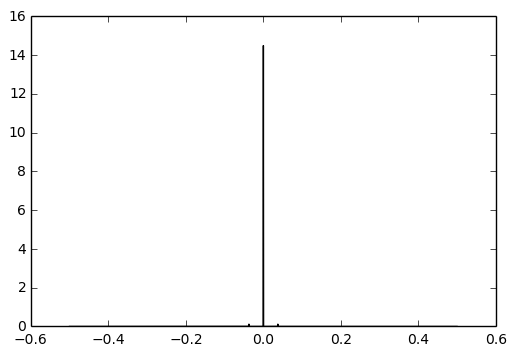

In [64]:
voltage = np.fft.fft(sunV)
freqs = np.fft.fftfreq(len(voltage), sunT)
power = np.abs(voltage)**2
pl.plot(np.fft.fftshift(freqs), np.fft.fftshift(power), 'k')
print len(sunV)

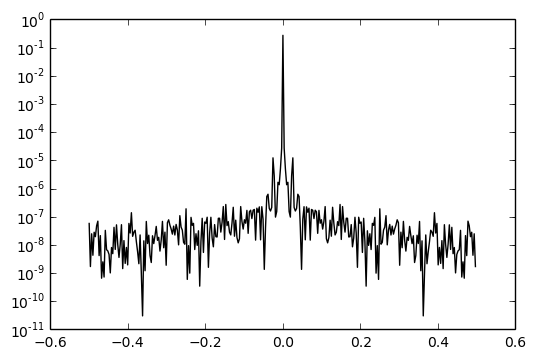

In [55]:
voltage = np.fft.fft(moonV)
freqs = np.fft.fftfreq(len(voltage), 1)
power = np.abs(voltage)**2
pl.semilogy(np.fft.fftshift(freqs), np.fft.fftshift(power), 'k')

1932


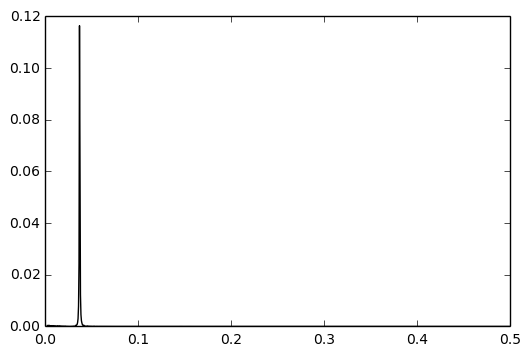

In [96]:

plotPower(sunV, sunT)
print len(sunV)

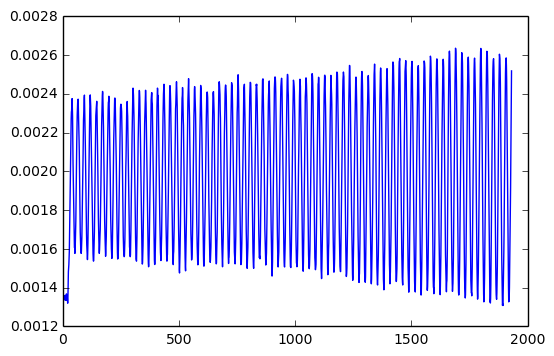

In [75]:
pl.plot(sunV)





15530
[15]
[16]
[9]
[9]
[1]
[0]
[3]
[5]
[2]
[0]
[2]
[9]
[0]
[14]
[5]
[15]
[2]
[4]
[0]
[4]
[0]
[2]
[19]
[4]
[15]
[1]
[1]
[0]
[1]
[0]
[4]
[0]
[2]
[0]
[1]
[1]
[6]
[3]
[0]
[3]
[0]
[2]
[7]
[3]
[8]
[0]
[0]
[8]
[5]
[10]
[3]
[0]
[3]
[14]
[1]
[2]
[0]
[0]
[4]
[0]
[8]
[2]
[0]
[1]
[5]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[6]
[0]
[7]
[8]
[4]
[0]
[0]
[14]
[3]
[1]
[0]
[5]
[4]
[3]
[0]
[0]
[19]
[2]
[3]
[2]
[0]
[9]
[8]
[4]
[16]
[0]
[11]
[0]
[0]
[0]
[0]
[0]
[0]
[7]
[2]
[3]
[10]
[0]
[1]
[0]
[2]
[5]
[1]
[4]
[8]
[2]
[1]
[3]
[1]
[1]
[0]
[3]
[0]
[0]
[0]
[3]
[1]
[0]
[0]
[0]
[4]
[3]
[0]
[0]
[1]
[3]
[0]
[0]
[0]
[0]
[6]
[1]
[1]
[3]
[9]
[3]
[0]
[1]
[8]
[1]
[5]
[6]
[2]
[7]
[3]
[2]
[0]
[0]
[8]
[10]
[0]
[0]
[13]
[6]
[2]
[0]
[14]
[1]
[3]
[0]
[0]
[6]
[0]
[0]
[1]
[5]
[0]
[0]
[1]
[15]
[2]
[1]
[0]
[0]
[3]
[5]
[0]
[0]
[1]
[3]
[0]
[10]
[0]
[2]
[1]
[1]
[7]
[0]
[1]
[1]
[2]
[0]
[14]
[3]
[2]
[8]
[1]
[1]
[1]
[0]
[1]
[3]
[2]
[3]
[1]
[8]
[4]
[3]
[0]
[0]
[0]
[8]
[1]
[5]
[0]
[0]
[1]
[2]
[0]
[0]
[1]
[9]
[3]
[3]
[0]
[2]
[11]
[0]
[1]
[0]
[0]
[1

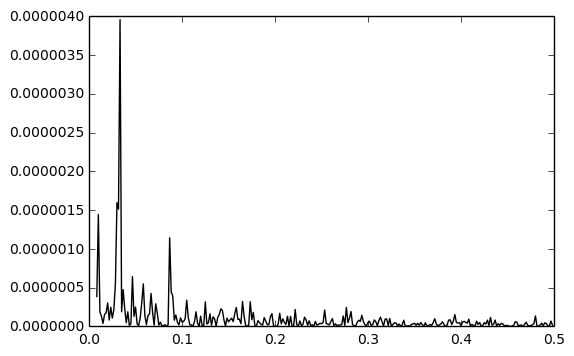

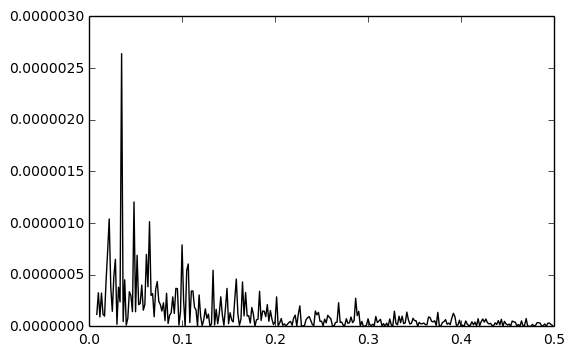

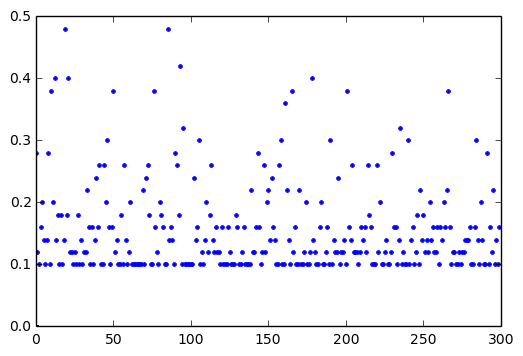

In [193]:
print(len(crabV))
plotPower(crabV[:600], crabT)
pl.figure()
plotPower(crabV[6000:6600], crabT)
pl.figure()
plotPower(crabV[-512:], crabT)
freqs1 = []
for i in range(15000/50):
   freqs1.append(plotPower(crabV[i*50:(i+1)*50], crabT))
print(len(freqs1))
#print(freqs1)
pl.plot(freqs1, '.')
print crab["arr_0"][-512]
print (0.0332032301768-0.0273438366162)*10**4


$\huge{f_{fringe} \approx (\frac{B_{ew}}{\lambda} \cos \delta) \cos{h_{s,o}}}$

print "f_f is " + str((20/.025)*np.cos((2*np.pi/360)*22.0144)*np.cos(0.9636616196717481


-((np.pi/180)*83.6))-(20/.025)*np.cos((2*np.pi/360)*22.0144)*np.cos(2.058860770834483

-((np.pi/180)*83.6)))



-0.0002586157384085979

In [191]:
1/.015*np.cos(np.radians(22.0144))*np.cos(8)

-8.9927719504510168